<a href="https://colab.research.google.com/github/DanOliveira-DS/data_science/blob/master/Projeto%20-%20Avalia%C3%A7%C3%A3o%20de%20Risco%5BNubank%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de Risco de Crédito


Uma das área que causa mais problemas para bancos, financiadoras e empresários é a taxa de inadimplência por parte da sua carteira de clientes.

Avaliar se uma pessoa irá deixar de cumprir com suas obrigações financeiras é de extrema importância, e pode causar um grande impacto no balanço da Instituição. Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de *default*. 

*Default* é o termo utilizado para indicar o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.

<center><img width=65% src="https://www.reachmarketing.com/wp-content/uploads/2017/07/data-enhancement.png"</center>

    





Grandes bancos e Fintechs têm apostado cada vez mais em modelos de *Machine Learning* para previnir a inadimplência de alguns clientes.

Dentre as principais instituições financeira, o [Nubank](https://nubank.com.br/sobre-nos) é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela Startup [Nubank](https://nubank.com.br/sobre-nos) a fim de revelar talentos e potenciais contratações pela Fintech.

**Contextualização do Problema**

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

<center><img width=25% src="https://upload.wikimedia.org/wikipedia/pt/thumb/0/08/Logo_nubank.png/200px-Logo_nubank.png"</center>
  
Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).



> OBJETIVO: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.


Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.

# Importando Bibliotecas

In [0]:
import numpy as np  
import pandas as pd 

# visualização
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# estilo dos graficos
sns.set_style('dark')

# ML
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

# Importando dataset
Iremos utilizar o metodo `read_csv()` da biblioteca pandas. Com isso vamos visualizar a 5 primeiras entradas do nosso dataset para verificar sua estrutura e ter uma analise inicial.

In [0]:
# importando dataset
nu_df = pd.read_csv('https://dl.dropbox.com/s/4l8tie8hbxdthrj/acquisition_train.csv?dl=0')

# visualizando a 5 primeiro entradas
nu_df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


Pontos importantes:
* Coluna `ids` identifica o usuario, passou por algum processo de descacterização. Pode ser descartada pois nao agrega na analise;
* `target_default` é nossa variável alvo. 
* As colunas `[score_1, score_2]` estão codificadas, iremos verificar mais afrente se podemos extrair informações uteis. Já `[score_3, score_4, score_5 e score_6]` são numericas. Score são metricas que mostram qual a chance de determinado perfil de consumidores pagar as suas contas em dia.
* Outras colunas como `['reason', 'state', 'zip', 'channel', 'job_name', 'real_state']` estão codificadas e também precisarão de alguma análise mais aprofundada para saber se é possível extrair alguma informação das mesmas.


# Análise Exploratória de Dados

## Tamanho do dataset
A primeira coisa que faremos após importar o dataset será examinar as dimensões do DataFrame e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.

Em relação à dimensionalidade dos dados, nosso dataset é composto por 45000 entradas e 43 atributos.

In [0]:
print("TAMANHO DO DATASET")
print(f"OBSERVATIONS:\t {nu_df.shape[0]} ")
print(f"FEATURES:\t {nu_df.shape[1]} ")

TAMANHO DO DATASET
OBSERVATIONS:	 45000 
FEATURES:	 43 


## Tipos dos dados
Com o comando `nu_df.head()` é possivel ter uma noção inicial de como estão nossos dados(numéricos ou categóricos), mas nao é possivel inferir com certeza o seu tipo.

Utilizando `nu_df.dtypes` vamos realizar o levantamento dos tipos de variáveis que compõem o DataFrame a fim de estabelecer a divisão entre as variáveis numéricas e as variáveis categóricas.

In [0]:
nu_df.dtypes.sort_values()

external_data_provider_credit_checks_last_month       int64
shipping_zip_code                                     int64
external_data_provider_fraud_score                    int64
application_time_in_funnel                            int64
n_bankruptcies                                      float64
n_issues                                            float64
n_accounts                                          float64
n_defaulted_loans                                   float64
external_data_provider_credit_checks_last_year      float64
ok_since                                            float64
external_data_provider_email_seen_before            float64
reported_income                                     float64
income                                              float64
last_borrowed_in_months                             float64
last_amount_borrowed                                float64
risk_rate                                           float64
score_6                                 

## Propriedades estatísticas do conjunto de dados
O comando nu_df.describe() nos ajuda a visualizar as propriedades estatísticas de variáveis numéricas. Exclui variáveis categoricas.

Imediatamente você obtém um resumo contendo algumas das principais informações estatísticas relevantes:

* count - quantidade de entradas válidas
* mean - média dos valores
* std - desvio padrão
* min - menor valor da coluna
* 25% - (Q1) primeiro quartil 25
* 50% - mediana
* 75% - (Q3) terceiro quartil 75
* max - maior valor da coluna

Com método .describe() é possível identificar colunas com valores ausentes e possíveis outliers (por exemplo, olhando o valor da mediana e comparando com valores máximos e mínimos)

In [0]:
nu_df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


conclusões:
* A coluna`external_data_provider_credit_checks_last_2_year` possui valores iguais a zero.
* A coluna `external_data_provider_email_seen_before` possui um valor min de -999. Isso pode indicar *outliers* ou foi tratado de forma incorreta. Vamos trata-lo subtituindo esses valores -999 por np.nan
* A coluna `reported_income` apresenta valores inf(infinito), os mesmo interfere nos nossos modelos, entao iremos trata-lo mais a frente tambem

## Valores Ausentes
Um passo importante na análise de dados é verificação de dados ausentes, isso porque a qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas. Caso eles sejam significativos será necessario um tratamento nos dados.

Temos duas formas de realizar essa leitura:

O comando `nu_df.info()` nos fornece um relatorio mais completo:
 * Como o número de valores preenchidos junto com os tipos de dados das colunas.
 * A quantidade desses tipos de dados
 * Quanto de memoria esta sendo consumida
 
O comando `nu_df.isnull().sum()` retorna o numero total de valores nulos para cada coluna do nosso DataFrame

In [0]:
nu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
ids                                                 45000 non-null object
target_default                                      41741 non-null object
score_1                                             44438 non-null object
score_2                                             44438 non-null object
score_3                                             44438 non-null float64
score_4                                             45000 non-null float64
score_5                                             45000 non-null float64
score_6                                             45000 non-null float64
risk_rate                                           44438 non-null float64
last_amount_borrowed                                15044 non-null float64
last_borrowed_in_months                             15044 non-null float64
credit_limit                                        31200 non-null flo

In [0]:
print("Porcentagem de valores nulos:")
print(f"\n{round((nu_df.isnull().sum()/nu_df.shape[0]).sort_values(ascending=False),3)}")

Porcentagem de valores nulos:

target_fraud                                        0.966
last_amount_borrowed                                0.666
last_borrowed_in_months                             0.666
ok_since                                            0.590
external_data_provider_credit_checks_last_2_year    0.503
external_data_provider_credit_checks_last_year      0.336
credit_limit                                        0.307
n_issues                                            0.257
facebook_profile                                    0.099
marketing_channel                                   0.080
job_name                                            0.074
target_default                                      0.072
external_data_provider_email_seen_before            0.050
lat_lon                                             0.030
user_agent                                          0.016
n_bankruptcies                                      0.015
n_defaulted_loans                        

Pontos levantados:
* Nosso pior caso é a variavel `target_fraud`, com mais de 90% dos dados ausentes. Como ela não interfere na nossa analise pode ser descartada
* Outras variaveis como `'last_amount_borrowed', 'last_borrowed_in_months', 'ok_since'` e `external_data_provider_credit_checks_last_2_year'` apresentam mais de 50% dos dados ausentes.
* As variáveis `'external_data_provider_credit_checks_last_year', 'credit_limit', 'n_issues'` possuem de 25%-33%

Nossa variável alvo `targer_default` apresenta dados ausentes que serao eliminados no precesso da limpeza dos dados. As demais discutiremos mais a frente.

## Visualização variavel alvo `target_default`

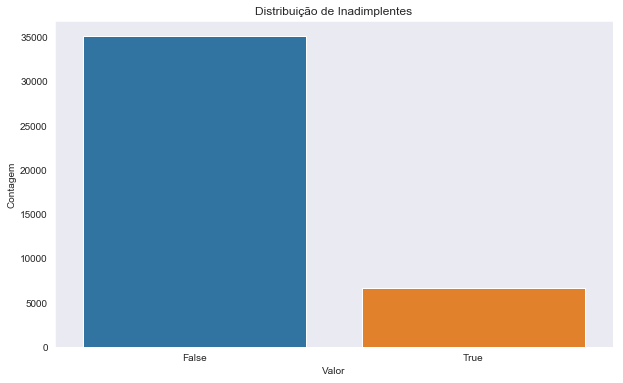

Proporção de inadimplentes no dataset (%)
False    0.779556
True     0.148022
Name: target_default, dtype: float64


In [0]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.countplot(nu_df.target_default, data=nu_df)
ax.set_title("Distribuição de Inadimplentes")
ax.set_xlabel("Valor")
ax.set_ylabel("Contagem")
plt.show()

print("Proporção de inadimplentes no dataset (%)")
print(f"{nu_df.target_default.value_counts()/ nu_df.shape[0]}")

Nosso gráfico mostra o desbalancemento do nosso dataset

# Limpeza dos Dados
A limpeza de dados é uma daquelas coisas que todos fazem, mas sobre a qual ninguém realmente fala. Na verdade, se você tiver um conjunto de dados devidamente limpo, até mesmo algoritmos simples podem aprender insights impressionantes com os dados!

Antes de realizar qualquer operação no dataset é bom criar uma cópia do mesmo, salvaguardando os dados originais. Assim podemos prosseguir com nossa limpeza que foram levantadas:
* Substituir os dados `np.inf` por `np.nan` na variavel `'reported_income'` 
* Substituir os dados -999 por `np.nan` na variavel `'external_data_provider_email_seen_before'`
* Descartar as colunas que não agregam valor as nossas analises ou demandam mais pesquisas
* Descartar entradas onde `'target_default'` é nula

In [0]:
# copia do dataset original
nu_clean = nu_df.copy()

# substituir inf por nan em reported_income
nu_clean['reported_income'] = nu_clean['reported_income'].replace(np.inf,
                                                                  np.nan)

#  substituir -999 em external_data_provider_email_seen_before por NaN
nu_clean.loc[nu_clean['external_data_provider_email_seen_before'] == -999.0,
             'external_data_provider_email_seen_before'] = np.nan

# descartar as colunas ids, target_fraud,
# external_data_provider_credit_checks_last_2_year e channel
nu_clean.drop(labels=['ids', 'target_fraud',
                      'external_data_provider_credit_checks_last_2_year',
                      'channel'], 
              axis=1,
              inplace=True)

# elminar colunas sem informação aparente ou que demandam mais pesquisa
drop_var = ['reason', 'zip', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags',
            'application_time_applied', 'email', 'marketing_channel',
            'profile_phone_number', 'shipping_state']

nu_clean.drop(labels=drop_var, axis=1, inplace=True)

# elminar as entradas onde target_default é NaN
nu_clean.dropna(subset=['target_default'], inplace=True)

Vamos verificar como ficou nosso novo dataset.

In [0]:
nu_clean.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,state,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,444,2,0.0,51.0,645,57849.0
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,346,1,0.0,17.0,243,4902.0
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,6,2,NaN,9.0,65,163679.0
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,406,3,NaN,38.0,815,1086.0
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,240,2,1.0,46.0,320,198618.0


## Lidando com os valores ausentes
Anteriormente fizemos o levantamento dos valores ausentes, mas não os tratamos. É recomendado lidar com eles de alguma forma pela razão de que a maioria dos algoritmos não aceita valores ausentes. Temos duas formas de realizar esse processo:

* **Dropping** - Eliminar as observações que têm valores ausentes
* **Imputing** - Atribuir valores aos valores ausentes com base no que foi analisado(ex:. média dos valores, valor zero...)



Apesar de não haver muitas informações sobre as variáveis, podemos assumir que vários dos valores ausentes se deve ao fato de que ao se preencher um formulário alguns itens não são obrigatórios, como por exemplo `profile_facebook`.



Para nosso *dataset* vamos estar aplicando o metodo do Imputing, vamos importar o metodo `SimpleImputer` da biblioteca `sklearn.impute`. Vamos realizar três etapas:

* 1- Substituir os valores ausentes por zero nas variaveis `last_amount_borrowed`, `last_borrowed_in_months`, `n_issues` utilizando o método `.fillna`.

* 2- Para as variaveis numericas, os valores ausentes vão ser substituidos pela mediana

* 3- Para as variáveis categóricas, os valores ausentes vão ser substituídos pelo valor mais frequente

In [0]:
# dividiando DataFrame
numeric_df = nu_clean.select_dtypes(exclude='object').columns
catg_df = nu_clean.select_dtypes(include='object').columns

# substituição de valores ausentes
nu_clean.last_amount_borrowed.fillna(value=0, inplace=True)
nu_clean.last_borrowed_in_months.fillna(value=0, inplace=True)
nu_clean.n_issues.fillna(value=0, inplace=True)

# variáveis numéricas
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(nu_clean.loc[:,numeric_df])
nu_clean.loc[:,numeric_df] = imputer.transform(nu_clean.loc[:,numeric_df])

# variáveis categóricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(nu_clean.loc[:,catg_df])
nu_clean.loc[:,catg_df] = imputer.transform(nu_clean.loc[:,catg_df])

Vamos verificar como está porcentagem dos valores ausentes

In [0]:
print(f"Porcentagem de valores nulos:")
print(f"\n{(nu_clean.isnull().sum()/nu_clean.shape[0]).sort_values(ascending=False)}")

Porcentagem de valores nulos:

reported_income                                    0.0
external_data_provider_fraud_score                 0.0
score_1                                            0.0
score_2                                            0.0
score_3                                            0.0
score_4                                            0.0
score_5                                            0.0
score_6                                            0.0
risk_rate                                          0.0
last_amount_borrowed                               0.0
last_borrowed_in_months                            0.0
credit_limit                                       0.0
income                                             0.0
facebook_profile                                   0.0
state                                              0.0
real_state                                         0.0
ok_since                                           0.0
n_bankruptcies                    

Agora temos um *dataset* limpo, pronto para as próximas etapas.

# Normalização dos Dados
A normalização dos seus dados, que já estão tratados, é uma pratica para evitar que seu algoritmo fique enviesado para as variáveis com maior ordem de grandeza.

Para isso vamos usar o módulo `StandardScaler` da biblioteca `sklearn.preprocessing`.

In [0]:
# Copia do DataFrame
scaled_df = nu_clean.copy()

# normalizar as colunas numéricas
numeric_cols = scaled_df.drop('target_default',
                         axis=1).select_dtypes(exclude='object').columns

scaled_df[numeric_cols] = StandardScaler().fit_transform(scaled_df[numeric_cols].values)

Continuando com a preparação dos dados, irei realizar o Label Encoding para possibilitar que as variáveis categóricas possam ser codificadas em forma de labels e alimentar o modelo de Machine Learning.

In [0]:
nuEncoded_df = scaled_df.copy()

# extrair as colunas categóricas
catg_cols = nuEncoded_df.select_dtypes('object').columns

# codificar cada coluna categórica
for col in catg_cols:
  nuEncoded_df[col+'_encoded'] = LabelEncoder().fit_transform(nuEncoded_df[col])
  nuEncoded_df.drop(col, axis=1, inplace=True)

abaixo vemos como ficou nosso *dataset* 

In [0]:
nuEncoded_df.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,score_1_encoded,score_2_encoded,state_encoded,real_state_encoded
0,False,0.032154,0.563484,-0.832617,0.848870,1.039282,2.627224,1.11413,-1.031599,-0.116075,1.412589,-0.094349,-0.278592,-0.057693,1.604337,1.577495,1.341208,0.444809,-1.427247,1.322812,0.501783,-0.040691,0,10,44,1
1,False,0.213805,-0.924750,1.538588,-0.789902,-0.536149,-0.577743,-0.68792,0.283752,0.553756,-0.707920,1.191063,-0.278592,-0.057693,0.732520,0.937596,0.671463,-0.452701,-1.427247,-0.635622,-0.894101,-0.040691,3,16,47,1
2,True,0.122980,0.006361,-0.512003,1.294382,-0.043827,0.345051,1.11413,-0.196782,-0.115893,-0.707920,-0.094349,-0.278592,-0.057693,-0.139296,-1.302049,-1.652141,0.444809,0.700650,-1.096430,-1.512178,-0.040691,3,9,32,3
3,False,1.485366,0.500243,1.694857,-0.500560,0.251567,-0.577743,-0.68792,0.775941,-0.043057,-0.707920,-0.094349,3.365634,-0.057693,1.822291,1.737469,1.081511,1.342319,0.700650,0.573999,1.092082,-0.040691,0,21,23,3
4,False,1.394540,-0.481355,0.114978,1.816579,-1.126935,-0.577743,-0.68792,-0.196782,-0.211806,1.412589,-0.094349,-0.278592,-0.057693,0.078658,-1.302049,-0.052955,0.444809,0.700650,1.034807,-0.626730,-0.040691,2,1,47,3


# Train/Test Split
Por fim, irei separar a variável alvo das demais e dividir o *dataset* entre dados de treino e teste com a função `train_test_split`.

In [0]:
# separar as variáveis independentes da variável alvo
X = nuEncoded_df.drop('target_default', axis=1).select_dtypes(exclude='object')
y = nuEncoded_df['target_default']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=2,
                                                    stratify=y)



# Aplicando Modelos de ML

Não foi realizada uma análise mais aprofundada sobre as variáveis e nem um tunning de parâmetros, mas construído um modelo simples para servir de baseline. Ressalta-se que os valores dos parâmetros foram generalistas e arbitrários. Trabalhamos com um dataset desbalanceado, o que pode gerar métricas que não representam a realidade da situação problemática do mundo real.

Será apresentada apenas a acurácia do modelo como métrica simples de avaliação. Pode-se assumir a premissa de que este é um problema multiobjetivo de otimização, onde espera-se minimizar tanto a quantidade de false positives quanto maximizar a quantidade de true positives.

Para esta etapa inicial, a utilizacão da métrica acurácia pode ser estabelecida a fim de comparação entre diferentes modelos de Machine Learning (ou estabelecer um benchmark).

Os modelos que iremos utilizar são:

 * Regressão Logistica
 * Decision Trees
 * Random Forest
 * XGBoost

In [0]:
## Regressão Logistica

In [0]:
# armazenar os resultados
score = {}

# instanciando o modelo e treinando o mesmo
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [0]:
# previsões e probabilidades em cima do dataset de teste
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)


print("Matriz de Confusão:")
print(lr_conf_matrix)

print("\nAcuracia do modelo:")
print(lr_acc_score)

print("\nRelatorio de Classificação:")
print(classification_report(y_test, lr_predict))



score.update({'Logistic_Regression': lr_acc_score})

Matriz de Confusão:
[[7011    6]
 [1329    3]]

Acuracia do modelo:
0.840100610851599

Relatorio de Classificação:
              precision    recall  f1-score   support

       False       0.84      1.00      0.91      7017
        True       0.33      0.00      0.00      1332

    accuracy                           0.84      8349
   macro avg       0.59      0.50      0.46      8349
weighted avg       0.76      0.84      0.77      8349



## Arvore de Decisão


In [0]:
# instanciando o modelo e treinando o mesmo
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [0]:
# previsões e probabilidades em cima do dataset de teste
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)

print("Matriz de Confusão:")
print(dt_conf_matrix)

print("\nAcuracia do modelo:")
print(dt_acc_score)

print("\nRelatorio de Classificação:")
print(classification_report(y_test, dt_predict))


score.update({'Decision_Tree_Classifier': dt_acc_score})

Matriz de Confusão:
[[5891 1126]
 [ 983  349]]

Acuracia do modelo:
0.7473948975925261

Relatorio de Classificação:
              precision    recall  f1-score   support

       False       0.86      0.84      0.85      7017
        True       0.24      0.26      0.25      1332

    accuracy                           0.75      8349
   macro avg       0.55      0.55      0.55      8349
weighted avg       0.76      0.75      0.75      8349



## Random Forest

In [0]:
# instanciando o modelo e treinando o mesmo
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

In [0]:
# previsões e probabilidades em cima do dataset de teste
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)

print("Matriz de Confusão:")
print(rf_conf_matrix)

print("\nAcuracia do modelo:")
print(rf_acc_score)

print("\nRelatorio de Classificação:")
print(classification_report(y_test, rf_predict))


score.update({'Random_Forest_Classifier': rf_acc_score})

Matriz de Confusão:
[[6986   31]
 [1288   44]]

Acuracia do modelo:
0.8420170080249132

Relatorio de Classificação:
              precision    recall  f1-score   support

       False       0.84      1.00      0.91      7017
        True       0.59      0.03      0.06      1332

    accuracy                           0.84      8349
   macro avg       0.72      0.51      0.49      8349
weighted avg       0.80      0.84      0.78      8349



## XGBoost

In [0]:
# instanciando o modelo e treinando o mesmo
xgb_model = XGBClassifier(learning_rate=0.01, n_estimators=1000,
                         max_depth=4, subsample = 0.9,
                         colsample_bytree = 0.1, gamma=1,
                         random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=1,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [0]:
# previsões e probabilidades em cima do dataset de teste
y_pred = xgb_model.predict(X_test)
xgb_acc_score = accuracy_score(y_test, y_pred)
xgb_conf_matrix = confusion_matrix(y_test, y_pred)


# ver performance do algoritmo
print("Matriz de Confusão:")
print(xgb_conf_matrix)

print("\nAcuracia do modelo:")
print (xgb_acc_score)

print("\nRelatorio de Classificação:")
print(classification_report(y_test, y_pred))


score.update({'XGBClassifier': xgb_acc_score})


Matriz de Confusão:
[[7014    3]
 [1326    6]]

Acuracia do modelo:
0.8408192597915918

Relatorio de Classificação:
              precision    recall  f1-score   support

       False       0.84      1.00      0.91      7017
        True       0.67      0.00      0.01      1332

    accuracy                           0.84      8349
   macro avg       0.75      0.50      0.46      8349
weighted avg       0.81      0.84      0.77      8349



# Comparação entre os modelos

In [0]:
modelScores = pd.DataFrame()
modelScores['Models'] = score.keys()
modelScores['Accuracy'] = score.values()
modelScores

,Models,Accuracy
0,Logistic_Regression,0.840101
1,Decision_Tree_Classifier,0.747395
2,Random_Forest_Classifier,0.842017
3,XGBClassifier,0.840819


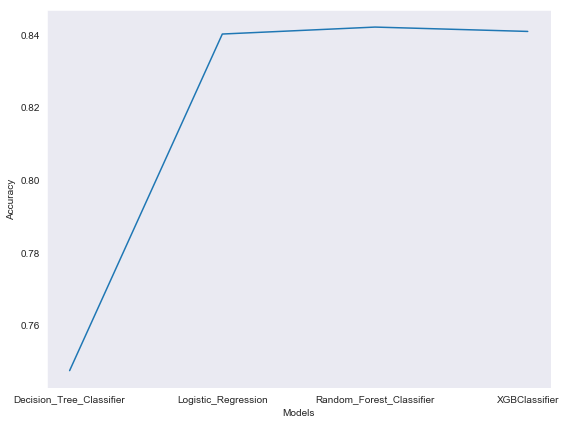

In [0]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x='Models', y='Accuracy', data=modelScores)


plt.tight_layout()